In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Loading the dataset as dataframe

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape # The dataset has in total 1.338k rows and 7 attributesb

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().any().any()

False

In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

FIVE POINT SUMMARY OF NUMERICAL DATA

In [7]:
summ = df.describe()
summ.loc[['min','max','25%','50%','75%']]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
max,64.0,53.13000,5.0,63770.428010
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515


Distribution of columns

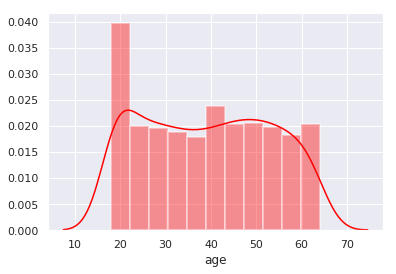

In [23]:
#distribution of age column
sns.set()
sns.distplot(df['age'],rug=False,kde=True,color='red',norm_hist=True,hist_kws={'linewidth':2})


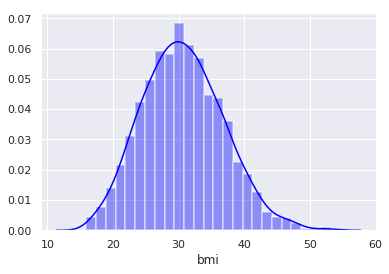

In [22]:
#distribution of bmi column
sns.distplot(df['bmi'],rug=False,kde=True,color='blue',norm_hist=True,hist_kws={'linewidth':2})


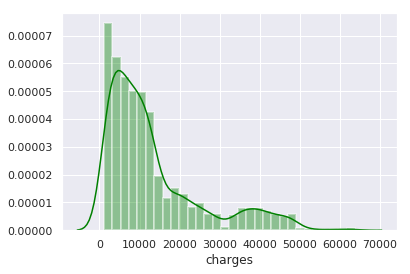

In [25]:
#distribution of bmi column
sns.distplot(df['charges'],rug=False,kde=True,color='green',norm_hist=True,hist_kws={'linewidth':2})


# Measure of skewness

          mean   50%
bmi  30.663397  30.4


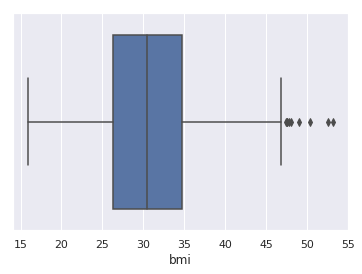

In [180]:
bmi = pd.DataFrame(df['bmi'].describe()[['mean','50%']]).T
sns.boxplot(df['bmi'])
print bmi

                 mean       50%
charges  13270.422265  9382.033


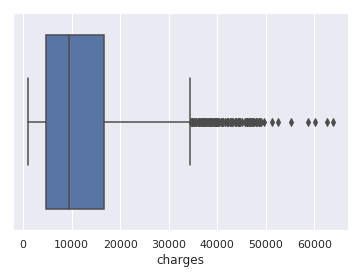

In [181]:
charges = pd.DataFrame(df['charges'].describe()[['mean','50%']]).T
sns.boxplot(df['charges'])
print charges

          mean   50%
age  39.207025  39.0


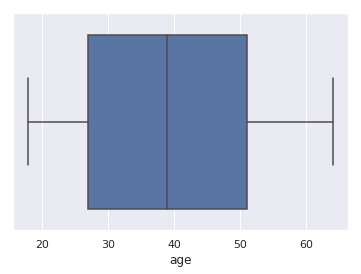

In [182]:
age = pd.DataFrame(df['age'].describe()[['mean','50%']]).T
sns.boxplot(df['age'])
print age

The above statistics prove that:

1. 'bmi' column has noe data skewness as median is veri similar to mean

2. 'charges' column is right-skewed as median is greater than mean

3. 'age' is not skewed as mean and median are very close

Also from the above figures,we can conclude that:

1. 'bmi' and 'charges' columns have outliers exceeding the maximum limit,

2. 'age' has no outlier

# Disctribution of categorical data

The distribution of categorical data can be measured by its countplot

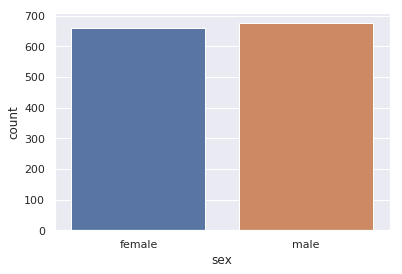

In [184]:
#distribution of sex column
sns.countplot(df['sex'])


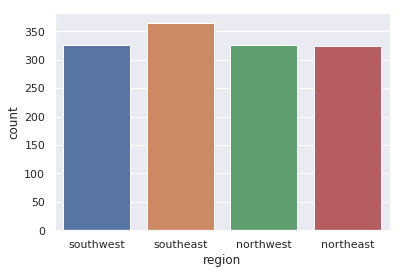

In [185]:
#distribution of region column
sns.countplot(df['region'])


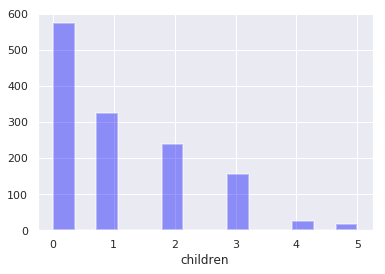

In [27]:
#distribution of children column
sns.distplot(df['children'],rug=False,kde=False,color='blue',norm_hist=False,hist_kws={'linewidth':2})


OR using countplot, will give the same result

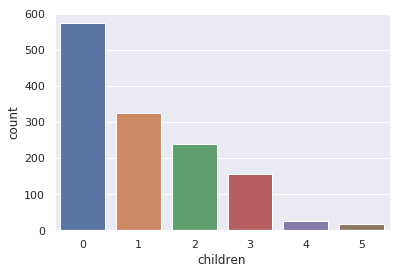

In [29]:
sns.countplot(df['children'])

# Pair plot that includes all the columns

Since the data set has 3 categorical data columns. plotting each categorical data with 4 numercial data columns

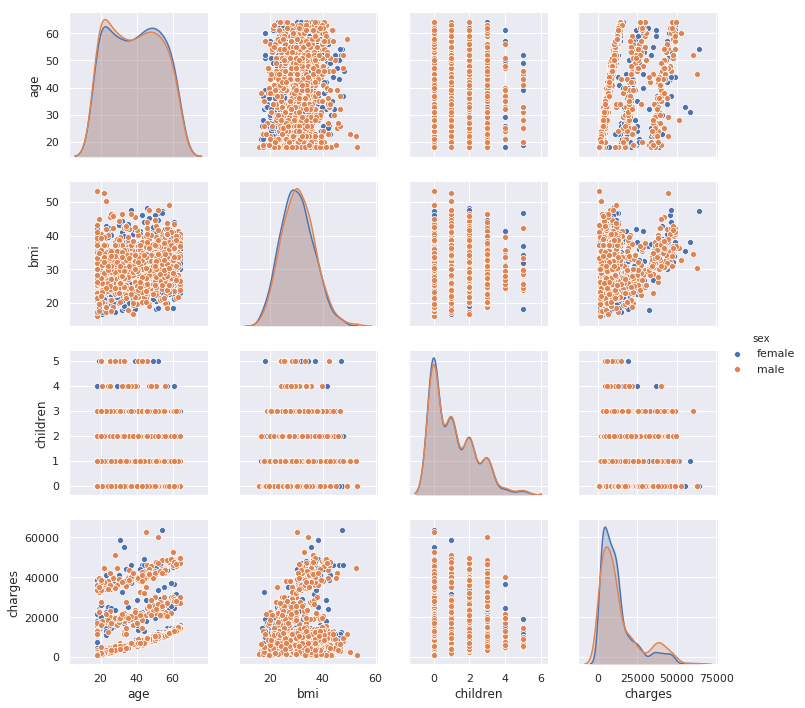

In [171]:
sns.pairplot(df[['age','bmi','sex','children','charges']],hue='sex')

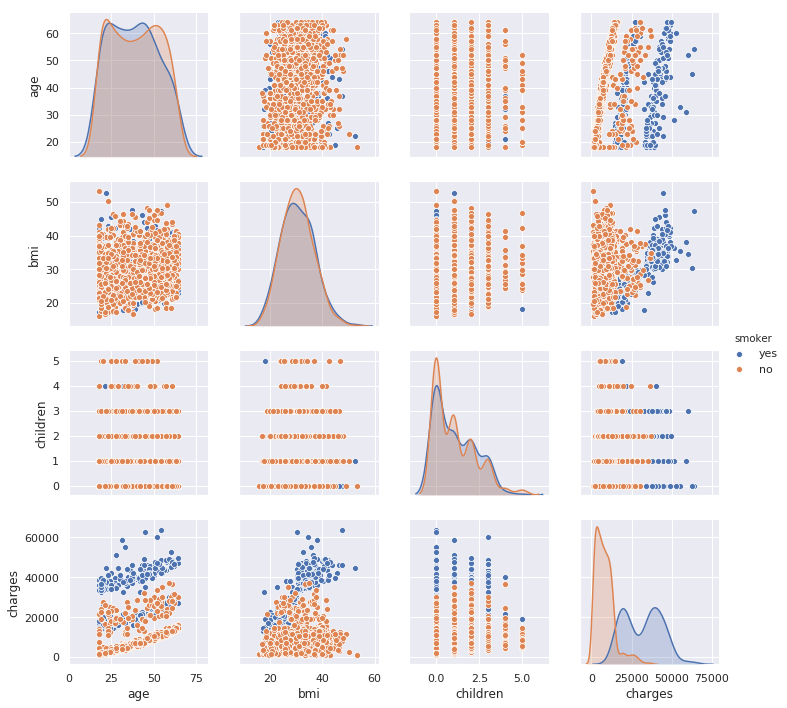

In [169]:
sns.pairplot(df[['age','bmi','children','charges','smoker']],hue='smoker')

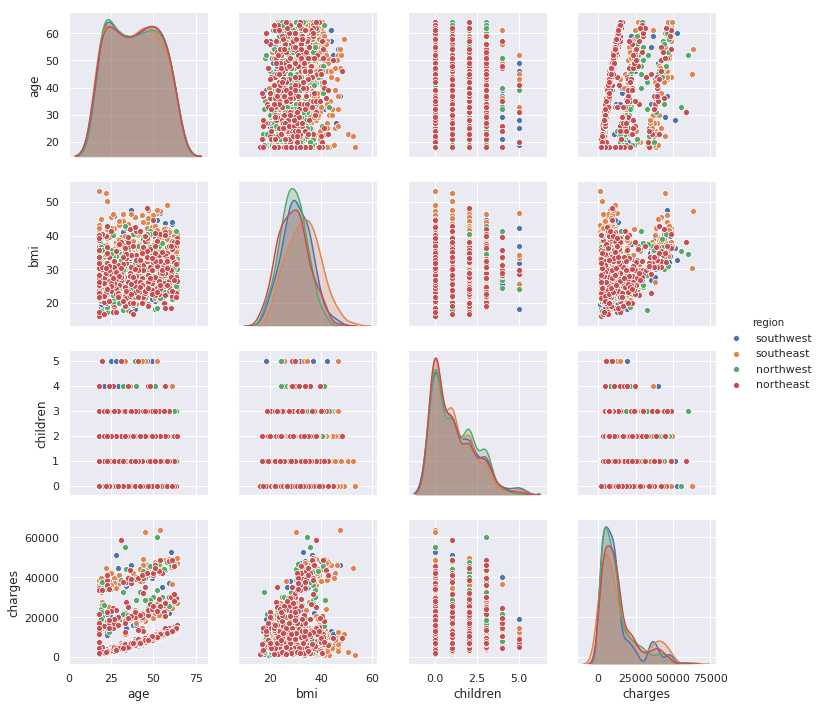

In [170]:
sns.pairplot(df[['age','bmi','children','charges','region']],hue='region')

#  Question 4

# comparsion of charges for smokers and non-smokers

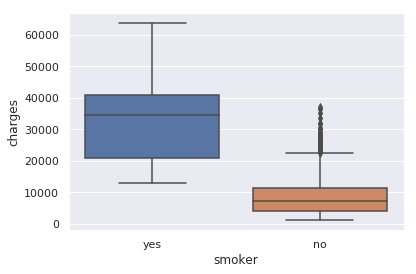

In [51]:
sns.boxplot(df['smoker'],df['charges'])

In [61]:
df[df['smoker']=='yes']['charges'].mean()

32050.23183153285

In [62]:
df[df['smoker']=='no']['charges'].mean()

8434.268297856199

The statistical evidence above show that the mean value of charges billed to smokers and non-smokers differ significantly. 

A. The mean of non-smokers is well below the mean of smokers (difference of about ~24k )

B. Even the min value of charge for a smoker is well above 75% of the charges for non-smokers

# Comparison of BMIs of males and females

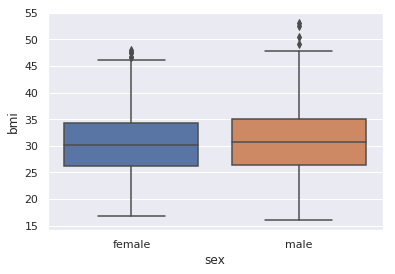

In [63]:
sns.boxplot(df['sex'],df['bmi'])

In [64]:
df[df['sex']=='female']['bmi'].mean()

30.377749244713023

In [65]:
df[df['sex']=='male']['bmi'].mean()

30.943128698224832

The above statistics and plot show that the BMI is independent of the  sexes and that the BMIs of amles is very near to that of females.

# Proportions of smokers based on gender

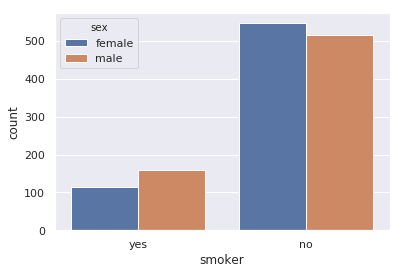

In [68]:
sns.countplot(df['smoker'],hue=df['sex'])

In [79]:
df[(df['smoker']=='no') & (df['sex']=='male')]['sex'].count()

517

In [80]:
df[(df['smoker']=='no') & (df['sex']=='female')]['sex'].count()

547

In [81]:
df[(df['smoker']=='yes') & (df['sex']=='male')]['sex'].count()

159

In [82]:
df[(df['smoker']=='yes') & (df['sex']=='female')]['sex'].count()

115

The above statistics and plot show that there is no significant differences between smokers and non-smokers based on gender

# Disctrinution of BMI across women with different no. of children

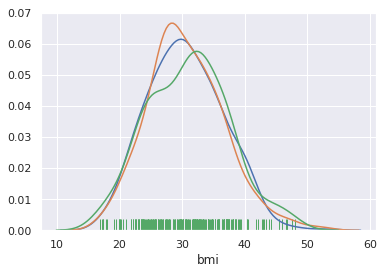

In [138]:
sns.distplot(df[df['children']==0]['bmi'],hist=False)
sns.distplot(df[df['children']==1]['bmi'],hist=False)
sns.distplot(df[df['children']==2]['bmi'],hist=False,rug=True)


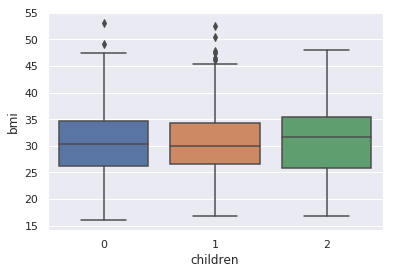

In [137]:
sns.boxplot(df['children'][df['children']<=2],df['bmi'])

In [163]:
child0 = pd.DataFrame(df['bmi'][df['children']==0].describe()[['mean','50%']]).T
child1 = pd.DataFrame(df['bmi'][df['children']==1].describe()[['mean','50%']]).T
child2 = pd.DataFrame(df['bmi'][df['children']==2].describe()[['mean','50%']]).T
child0.append([child1,child2])


,mean,50%
bmi,30.550296,30.3025
bmi,30.623148,30.0150
bmi,30.978104,31.6400


From the above 2 plots and statistics we can see that the distribution of bmi is normal for across women with number of children 0,1 and 2. However, distribution for women with 2 children is somewhat left skewed as the median is slightly above the mean.